*Nguyễn Phúc Minh Long - 18110137*

# Lab03 - Image Processing and Analysis

In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from pylab import imread, savefig
from skimage.color import rgb2gray

In [2]:
def imshows(ImageData, LabelData, rows, cols, gridType=False):
    # Convert ImageData and LabelData to list
    ImageArray = list(ImageData)
    LabelArray = list(LabelData)
    if (rows == 1 & cols == 1):
        fig = plt.figure(figsize=(20,20))
    else: 
        fig = plt.figure(figsize=(cols*8, rows*5))
    for i in range (1, rows * cols + 1):
        fig.add_subplot(rows, cols, i)
        image = ImageArray[i - 1]
        # If the channel number is less than 3, we display as grayscale image
        # otherwise, we display as color image
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        plt.grid(gridType)
        plt.title(LabelArray[i - 1])
    plt.show()
    
def ShowThreeImages(IM1, IM2, IM3, LB1="Image 1", LB2="Image 2", LB3="Image 3"):
    imshows([IM1, IM2, IM3], [LB1, LB2, LB3], 1, 3)
    
def ShowTwoImages(IM1, IM2, LB1="Image 1", LB2="Image 2"):
    imshows([IM1, IM2], [LB1, LB2], 1, 2)
    
def ShowOneImage(IM, LB="Image"):
    imshows([IM], [LB], 1, 1)
    
def ShowListImages(listImage, row, col, listCaption=['a']):
    if len(listImage) != len(listCaption):
        listCaption = []
        for i in range(len(listImage)):
            listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

## Exercise 1 - Chọn 1 ảnh từ internet bất kỳ và thực hiện các thao tác:

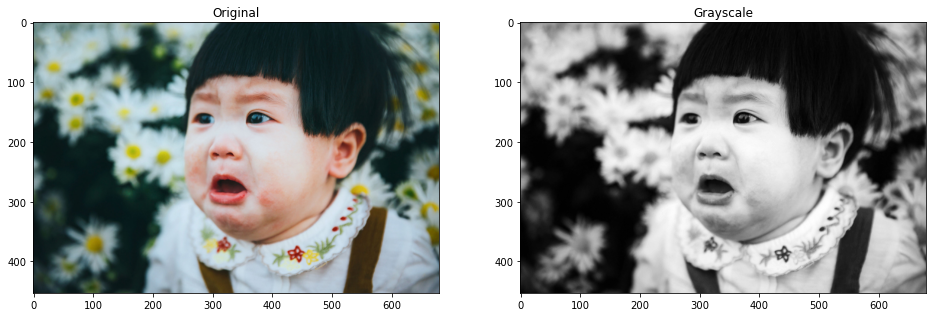

In [3]:
# Read Image

image_color = imread("Image/LA.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowTwoImages(image_color, image_gray, "Original", "Grayscale")

### a) Làm mờ ảnh với các kernel 3x3 và 5x5

Filtering Kernel 3x3:


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

Filtering Kernel 5x5:


array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

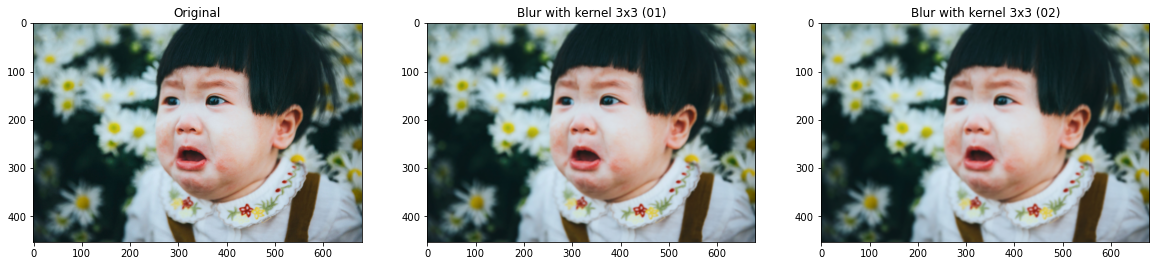

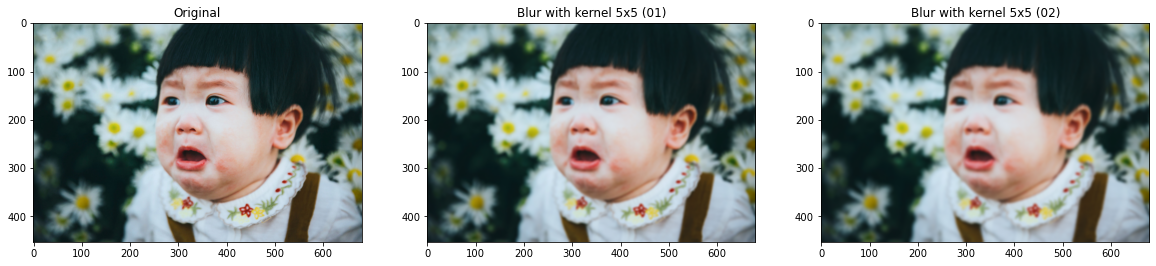

In [4]:
kernel_3_3 = np.ones((3,3),np.float32)/9
kernel_5_5 = np.ones((5,5),np.float32)/25
print("Filtering Kernel 3x3:")
display(kernel_3_3)
print("Filtering Kernel 5x5:")
display(kernel_5_5)
image_filter_3_3_01 = cv2.filter2D(image_color,-1,kernel_3_3)
image_filter_3_3_02 = cv2.filter2D(image_filter_3_3_01,-1,kernel_3_3)
image_filter_5_5_01 = cv2.filter2D(image_color,-1,kernel_5_5)
image_filter_5_5_02 = cv2.filter2D(image_filter_5_5_01,-1,kernel_5_5)
ShowThreeImages(image_color, image_filter_3_3_01, image_filter_3_3_02, "Original", "Blur with kernel 3x3 (01)", "Blur with kernel 3x3 (02)")
ShowThreeImages(image_color, image_filter_5_5_01, image_filter_5_5_02, "Original", "Blur with kernel 5x5 (01)", "Blur with kernel 5x5 (02)")

### b) Xuất giá trị đo mức độ mờ 

In [5]:
def variance_of_laplacian(image):

    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

blur_mesurement = variance_of_laplacian(image_color)

blur_mesurement_3_3_01 = variance_of_laplacian(image_filter_3_3_01)
blur_mesurement_3_3_02 = variance_of_laplacian(image_filter_3_3_02)
blur_mesurement_5_5_01 = variance_of_laplacian(image_filter_5_5_01)
blur_mesurement_5_5_02 = variance_of_laplacian(image_filter_5_5_02)
print("Blur Measurement of image_color:", blur_mesurement)
print("Blur Measurement of image_filter_3_3_01:", blur_mesurement_3_3_01)
print("Blur Measurement of image_filter_3_3_02:", blur_mesurement_3_3_02)
print("Blur Measurement of image_filter_5_5_01:", blur_mesurement_5_5_01)
print("Blur Measurement of image_filter_5_5_02:", blur_mesurement_5_5_02)

Blur Measurement of image_color: 56.28915099227805
Blur Measurement of image_filter_3_3_01: 14.178264659654364
Blur Measurement of image_filter_3_3_02: 9.087570430547716
Blur Measurement of image_filter_5_5_01: 6.815819578046901
Blur Measurement of image_filter_5_5_02: 4.198726803688962


### c) Viết dòng thông tin về giá trị mức độ mờ trên ảnh 

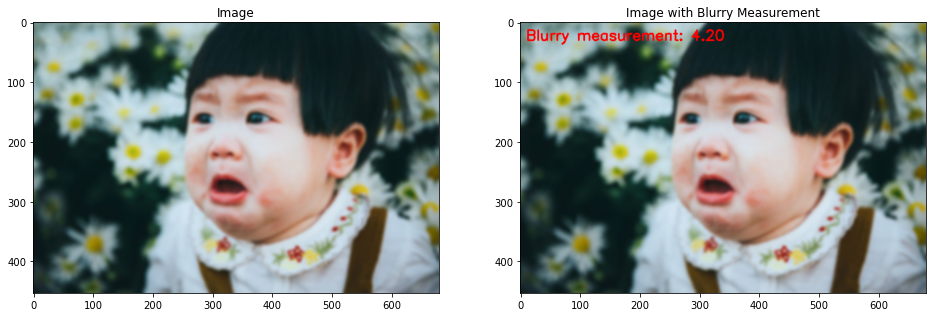

In [6]:
text = "Blurry measurement"
fm = blur_mesurement_5_5_02
image_filter_5_5_02_text = image_filter_5_5_02.copy()
cv2.putText(image_filter_5_5_02_text, "{}: {:.2f}".format(text, fm), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
(255, 0, 0), 2)
ShowTwoImages(image_filter_5_5_02, image_filter_5_5_02_text, "Image", "Image with Blurry Measurement")

## Exercise 2 - Chọn 1 ảnh từ internet bất kỳ và thực hiện các thao tác:

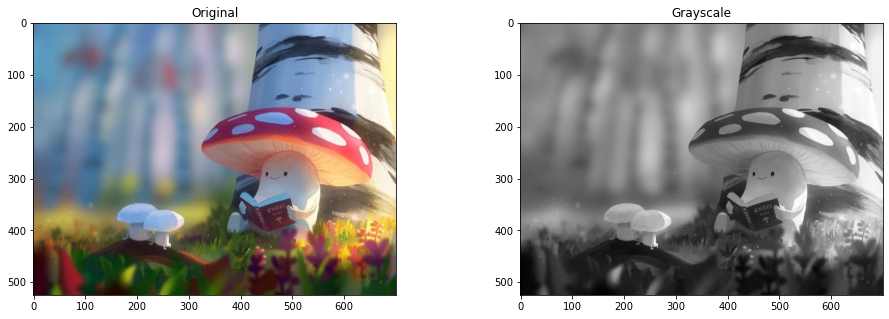

In [7]:
# Read Image

image_color = imread("Image/OnceUpon.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowTwoImages(image_color, image_gray, "Original", "Grayscale")

### a) Làm rõ ảnh với các kernel 3x3 và 5x5 

Filtering Kernel 3x3:


array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

Filtering Kernel 5x5:


array([[ 0,  0, -1,  0,  0],
       [ 0, -1, -2, -1,  0],
       [-1, -2, 16, -2, -1],
       [ 0, -1, -2, -1,  0],
       [ 0,  0, -1,  0,  0]])

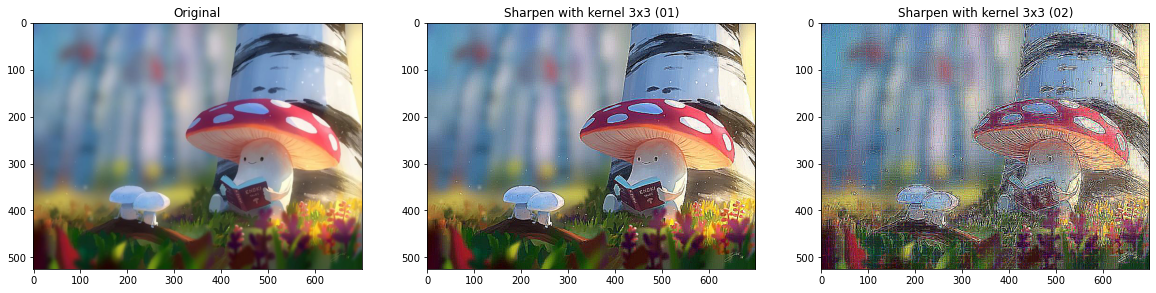

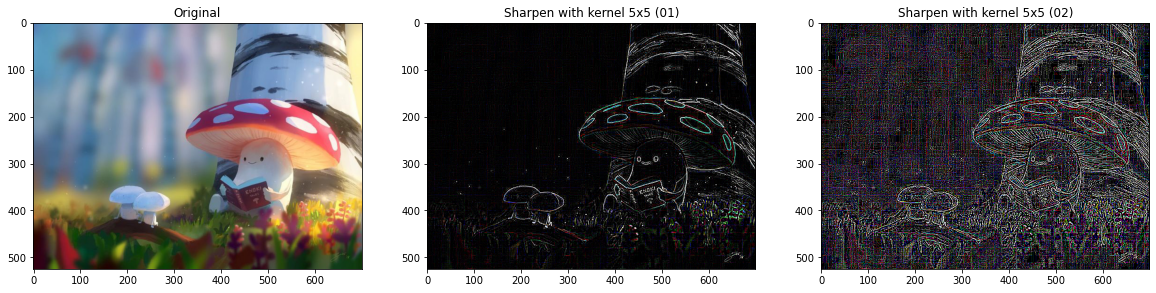

In [8]:
kernel_3_3 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
kernel_5_5 = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
print("Filtering Kernel 3x3:")
display(kernel_3_3)
print("Filtering Kernel 5x5:")
display(kernel_5_5)
image_filter_3_3_01 = cv2.filter2D(image_color,-1,kernel_3_3)
image_filter_3_3_02 = cv2.filter2D(image_filter_3_3_01,-1,kernel_3_3)
image_filter_5_5_01 = cv2.filter2D(image_color,-1,kernel_5_5)
image_filter_5_5_02 = cv2.filter2D(image_filter_5_5_01,-1,kernel_5_5)
ShowThreeImages(image_color, image_filter_3_3_01, image_filter_3_3_02, "Original", "Sharpen with kernel 3x3 (01)", "Sharpen with kernel 3x3 (02)")
ShowThreeImages(image_color, image_filter_5_5_01, image_filter_5_5_02, "Original", "Sharpen with kernel 5x5 (01)", "Sharpen with kernel 5x5 (02)")

### b) Xuất giá trị đo mức độ rõ 

In [9]:
sharpen_mesurement = variance_of_laplacian(image_color)

sharpen_mesurement_3_3_01 = variance_of_laplacian(image_filter_3_3_01)
sharpen_mesurement_3_3_02 = variance_of_laplacian(image_filter_3_3_02)
sharpen_mesurement_5_5_01 = variance_of_laplacian(image_filter_5_5_01)
sharpen_mesurement_5_5_02 = variance_of_laplacian(image_filter_5_5_02)
print("Sharpen Measurement of image_color:", sharpen_mesurement)
print("Sharpen Measurement of image_filter_3_3_01:", sharpen_mesurement_3_3_01)
print("Sharpen Measurement of image_filter_3_3_02:", sharpen_mesurement_3_3_02)
print("Sharpen Measurement of image_filter_5_5_01:", sharpen_mesurement_5_5_01)
print("Sharpen Measurement of image_filter_5_5_02:", sharpen_mesurement_5_5_02)

Sharpen Measurement of image_color: 129.57425137531877
Sharpen Measurement of image_filter_3_3_01: 5797.543774826533
Sharpen Measurement of image_filter_3_3_02: 85648.91527323834
Sharpen Measurement of image_filter_5_5_01: 8000.022157208121
Sharpen Measurement of image_filter_5_5_02: 103268.98470306417


### c) Viết dòng thông tin về giá trị mức độ rõ trên ảnh

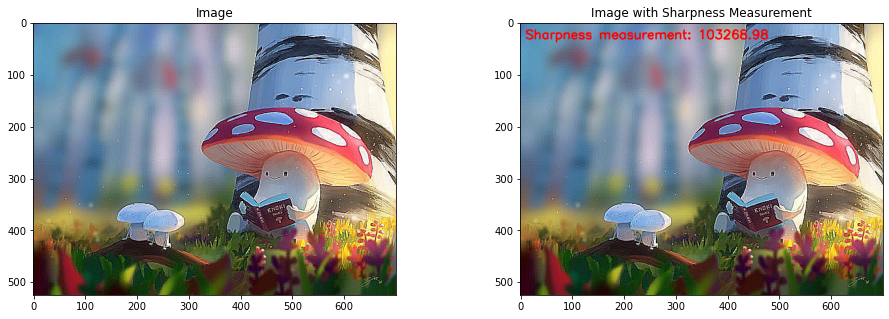

In [10]:
text = "Sharpness measurement"
fm = sharpen_mesurement_5_5_02
image_filter_3_3_01_text = image_filter_3_3_01.copy()
cv2.putText(image_filter_3_3_01_text, "{}: {:.2f}".format(text, fm), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
(255, 0, 0), 2)
ShowTwoImages(image_filter_3_3_01, image_filter_3_3_01_text, "Image", "Image with Sharpness Measurement")

## Exercise 3 - Tạo một thư mục ảnh gồm 5 ảnh (kiếm từ Internet), và thực hiện các thao tác:

### a) Viết hàm đọc toàn bộ ảnh trong thư mục “Image_Input” đó vào một List ảnh

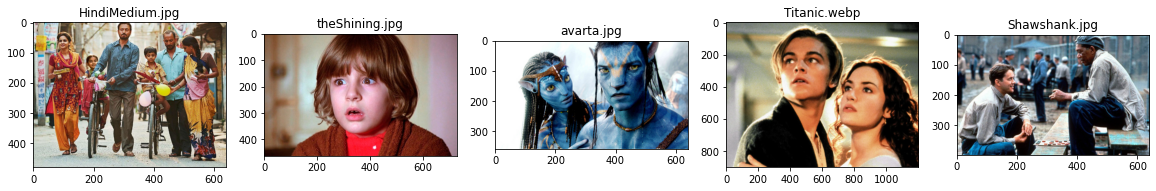

In [11]:
import os
path = "./Image_Input"
FJoin = os.path.join
files = [FJoin(path, f) for f in os.listdir(path)]
img_list = []
img_list_name = []
for file in files:
    img_list.append(imread(file))
    img_list_name.append(file[len(path)+1:])
ShowListImages(img_list, 1, 5, img_list_name)

### b) Định nghĩa ngưỡng mờ dựa trên giá độ đo mờ.
### c) Đọc lần lượt các ảnh : nếu ảnh nào ngoài ngưỡng mờ ta ghi một dòng thông tin trên ảnh là “Blur Image :” kèm giá trị mờ. Nếu ảnh nào tốt thì ta ghi “Good Image” trên ảnh.  

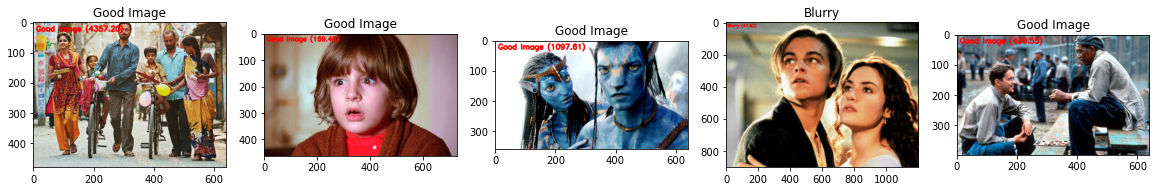

In [12]:
threshold = 100
img_list_detect_blur = []
index = -1
cap = []
for img in img_list:
    img_list_detect_blur.append(img)
    index += 1
    fm = variance_of_laplacian(img_list_detect_blur[index])
    text = "Good Image"
    # if the focus measure is less than the supplied threshold,
    # then the image should be considered "blurry"
    if fm < threshold:
        text = "Blurry"
    cap.append(text)
    # show the image
    cv2.putText(img_list_detect_blur[index], f"{text} ({fm:.2f})", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 3)
ShowListImages(img_list, 1, 5, cap)

### d) Tất cả các ảnh sau khi đánh giá được lưu vào một thư mục “Image_BlurDetection_Output”

In [13]:
index = 0
for img in img_list_detect_blur:
    cv2.imwrite(f"./Image_BlurDetection_Output/(Blur Detected) {img_list_name[index]}", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    index += 1

## Exercise 4 - Chọn 1 ảnh từ internet bất kỳ và thực hiện các thao tác:

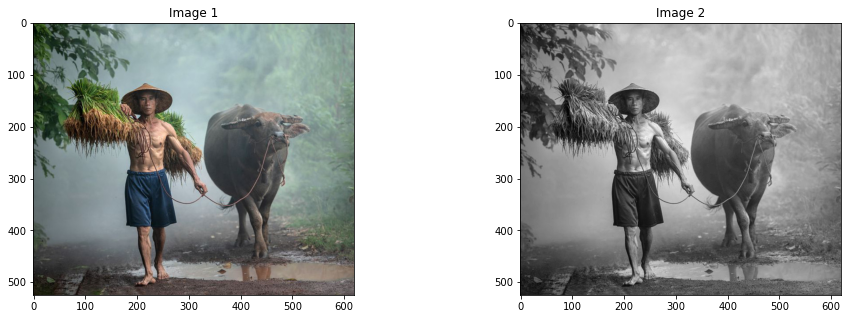

In [14]:
# Read Image

image_color = imread("Image/brvn.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowTwoImages(image_color, image_gray)

### a) Xuất ảnh từng điểm ảnh hiển thị giá trị RGBMax

In [15]:
def max_rgb_filter(image):
    # split the image into its BGR components
    (B, G, R) = cv2.split(image)
    # find the maximum pixel intensity values for each
    # (x, y)-coordinate,, then set all pixel values less
    # than M to zero
    M = np.maximum(np.maximum(R, G), B)
    R[R < M] = 0
    G[G < M] = 0
    B[B < M] = 0
    # merge the channels back together and return the image
    return cv2.merge([B, G, R])

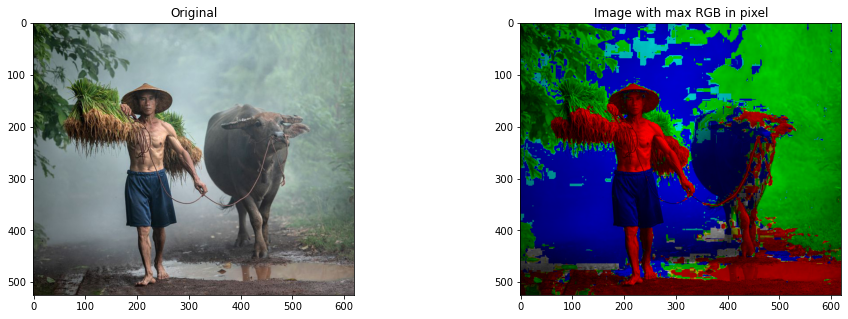

In [16]:
image_color_rgbmax = max_rgb_filter(image_color)
ShowTwoImages(image_color, image_color_rgbmax, "Original", "Image with max RGB in pixel")

### b) Xuất các vị trí có giá trị R đạt max, G đạt max và B đạt max

In [17]:
def SegmentColorImageByMask(IM, Mask):
    Mask = Mask.astype(np.uint8)
    result = cv2.bitwise_and(IM, IM, mask = Mask)
    return result

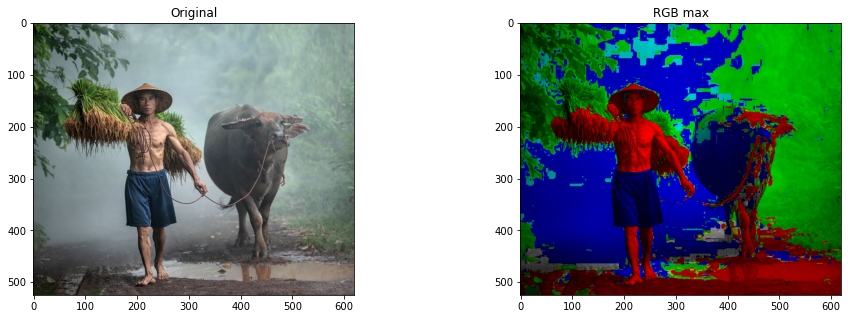

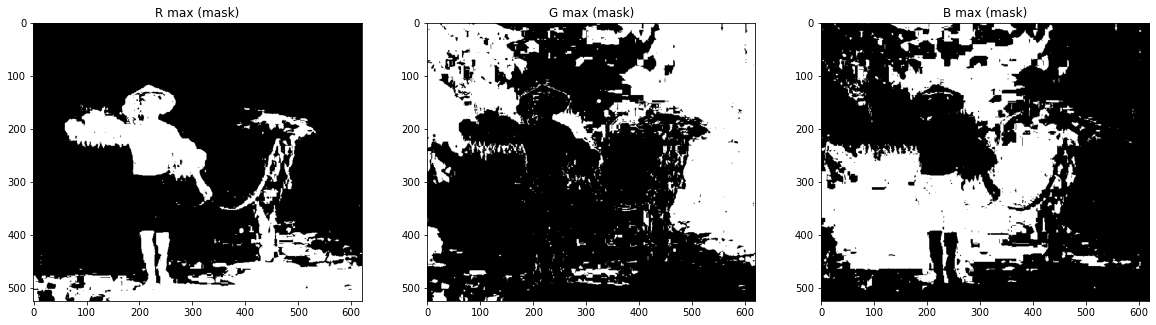

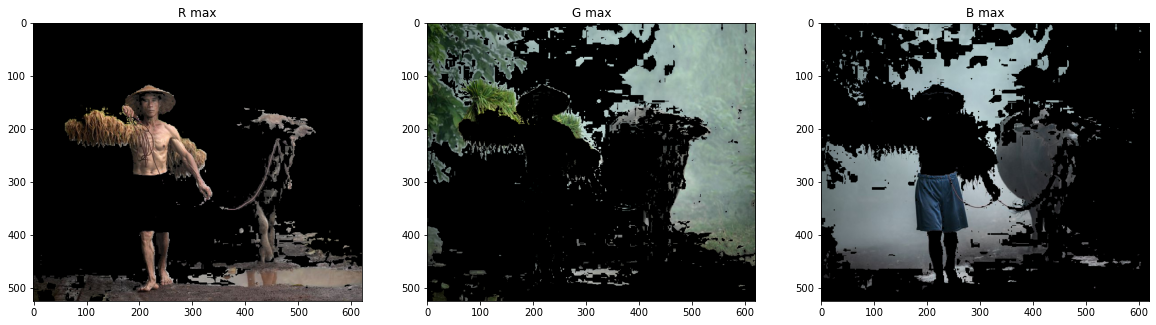

In [18]:
image_maxR_mask = image_gray < 0
image_maxG_mask = image_gray < 0
image_maxB_mask = image_gray < 0
R = image_color_rgbmax[:,:,0]
G = image_color_rgbmax[:,:,1]
B = image_color_rgbmax[:,:,2]
image_maxR_mask[(G == 0) & (B == 0)] = 1
image_maxG_mask[(R == 0) & (B == 0)] = 1
image_maxB_mask[(G == 0) & (R == 0)] = 1
image_maxR = SegmentColorImageByMask(image_color, image_maxR_mask)
image_maxG = SegmentColorImageByMask(image_color, image_maxG_mask)
image_maxB = SegmentColorImageByMask(image_color, image_maxB_mask)
ShowTwoImages(image_color, image_color_rgbmax, "Original", "RGB max")
ShowThreeImages(image_maxR_mask, image_maxG_mask, image_maxB_mask, "R max (mask)", "G max (mask)", "B max (mask)")
ShowThreeImages(image_maxR, image_maxG, image_maxB, "R max", "G max", "B max")

In [19]:
def compare_blur(img1, img2):
    blur_mesurement = variance_of_laplacian(img1)
    blur_mesurement_01 = variance_of_laplacian(img2)
    if (blur_mesurement_01 == blur_mesurement):
        return "[EQUAL] to", f"{blur_mesurement} = {blur_mesurement}"
    elif (blur_mesurement_01 < blur_mesurement):
        return "[LESS] than", f"{blur_mesurement_01} < {blur_mesurement}"
    elif (blur_mesurement_01 > blur_mesurement):
        return "[MORE] than", f"{blur_mesurement_01} > {blur_mesurement}"
    return False

### c) Thực hiện làm mờ ảnh rồi sau đó làm rõ ảnh và so sánh giá trị đo độ mờ có giống ảnh gốc không 

Blurry measurement of image that blurred then sharpened is [MORE] than blurry measurement of original image
(2035.3019438098445 > 701.9435712070052)


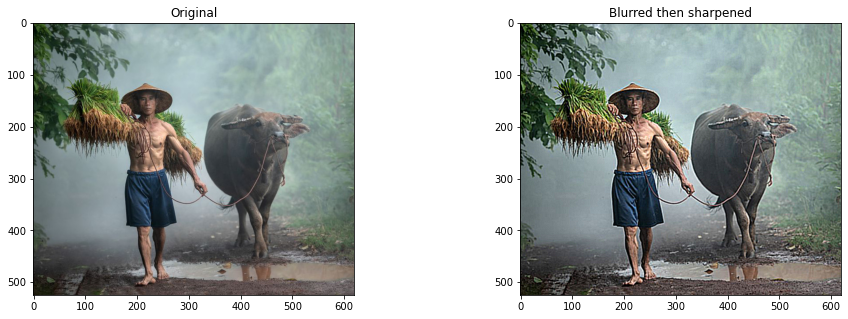

In [20]:
kernel_blur = np.ones((3,3),np.float32)/9
kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

image_blur = cv2.filter2D(image_color,-1,kernel_blur)
image_blur_sharpen = cv2.filter2D(image_blur,-1,kernel_sharpen)

result1, result2 = compare_blur(image_color, image_blur_sharpen)
print(f"Blurry measurement of image that blurred then sharpened is {result1} blurry measurement of original image")
print(f"({result2})")
ShowTwoImages(image_color, image_blur_sharpen, "Original", "Blurred then sharpened")

### d) Thực hiện làm rõ ảnh rồi sau đó làm mờ ảnh và so sánh giá trị đo độ mờ có giống ảnh gốc không 

Blurry measurement of image that sharpened then blurred is [LESS] than blurry measurement of original image
(57.24497254733129 < 701.9435712070052)


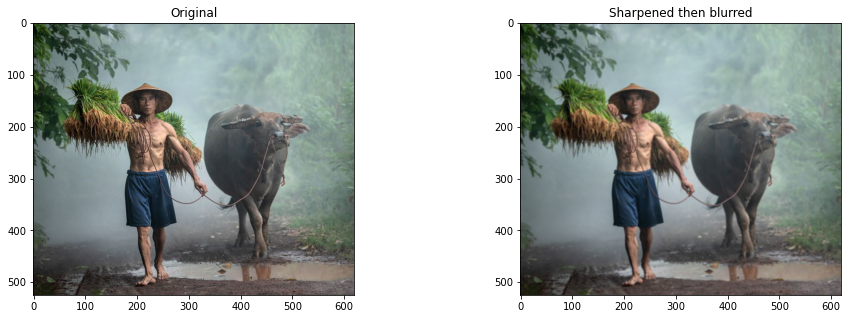

In [21]:
image_sharpen = cv2.filter2D(image_color,-1,kernel_sharpen)
image_sharpen_blur = cv2.filter2D(image_color,-1,kernel_blur)
result1, result2 = compare_blur(image_color, image_sharpen_blur)
print(f"Blurry measurement of image that sharpened then blurred is {result1} blurry measurement of original image")
print(f"({result2})")
ShowTwoImages(image_color, image_sharpen_blur, "Original", "Sharpened then blurred")

### e) Tìm cạnh và tạo ra các ảnh về cạnh sau : ảnh cạnh ngang, cạnh dọc và ảnh cạnh tổng 

In [22]:
# construct the Laplacian kernel used to detect edge-like

# regions of an image
# construct the Sobel x-axis kernel
kernel_sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
kernel_sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

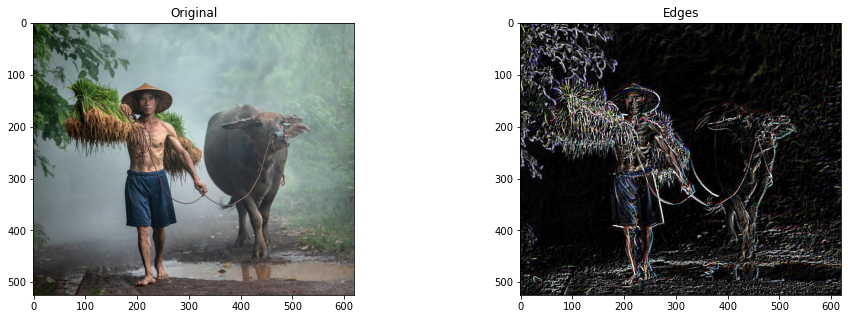

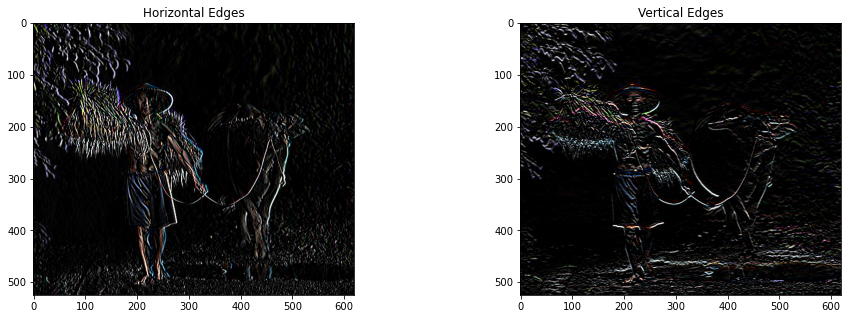

In [23]:
image_color_edge_sobelX = cv2.filter2D(image_color, -1, kernel_sobelX)
image_color_edge_sobelY = cv2.filter2D(image_color, -1, kernel_sobelY)
image_color_edge = image_color_edge_sobelX + image_color_edge_sobelY
ShowTwoImages(image_color, image_color_edge, "Original", "Edges")
ShowTwoImages(image_color_edge_sobelX, image_color_edge_sobelY, "Horizontal Edges", "Vertical Edges")

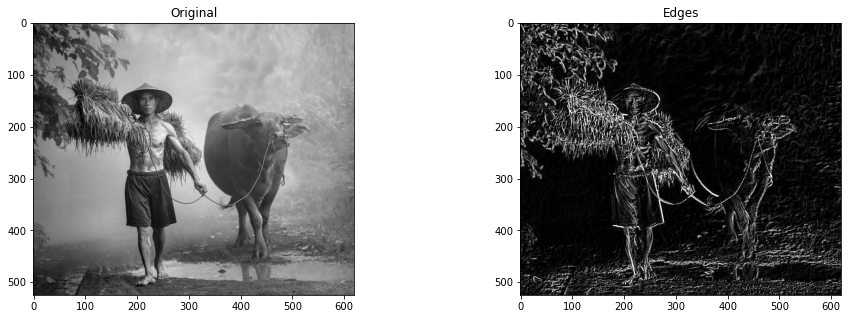

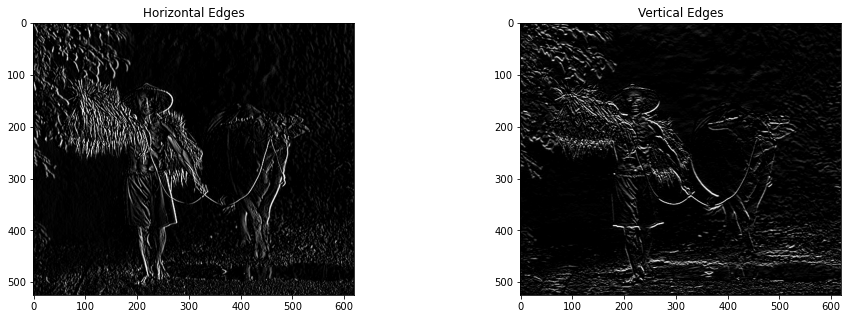

In [24]:
image_gray_edge_sobelX = cv2.filter2D(image_gray, -1, kernel_sobelX)
image_gray_edge_sobelY = cv2.filter2D(image_gray, -1, kernel_sobelY)
image_gray_edge = image_gray_edge_sobelX + image_gray_edge_sobelY
ShowTwoImages(image_gray, image_gray_edge, "Original", "Edges")
ShowTwoImages(image_gray_edge_sobelX, image_gray_edge_sobelY, "Horizontal Edges", "Vertical Edges")